In [14]:
# Loaded in the data. Data is published via google docs. Cell should run.

import pandas as pd
import numpy as np

# Data is broken down per decade 
dataset00 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vSFqeUFGZwH52bU-IepHfp2xRD3A0asGpGJRd3jaJYA4PwAmUju-5CmnepyBAvc64rY6gXwn2nUQG0e/pub?output=csv')
dataset10 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vR-Sc2ksuQCaZmH_Hy90bhCCP13AOVlBFAMRNwVYgEcT3RO-0UimxD9Loi5KVDOnurxvBoteW-whOWp/pub?output=csv')
dataset60 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vTPxGmOZVXdAYr2D5_ml_3YRXorUVarxlTQ4bYzews8YXWSY8ArdFAyxffvm8gmI-FxMr_8vJtCK_Y-/pub?output=csv')
dataset70 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vTINdcUA6cKJyHJS76NrcXPLbX_jFjt5S4pNIdAKw-4GF1w8ngBeorLrAPEYxSqgnxE9MybmzQ9NYXK/pub?output=csv')
dataset80 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vR5LNcY8trkxu8vIJHf8Ha0vDO9Xz2k2M7UCdEGhaJxz9vnB_SqET9fy88icZwIjPKeK8USi05_0zii/pub?output=csv')
dataset90 = pd.read_csv(r'https://docs.google.com/spreadsheets/d/e/2PACX-1vRFUiB5RX_2qMQuZSuP-u_wQvjqlaSOTeKY4uGjwfeoGTgZUCesq46xlYjLqi4vmN-VQ4zK0Zm-jXmw/pub?output=csv')                                               
dataset00.shape, dataset10.shape, dataset60.shape, dataset70.shape, dataset80.shape, dataset90.shape

((5872, 19), (6398, 19), (8642, 19), (7766, 19), (6908, 19), (5520, 19))

In [15]:
# Full frames of all dummy data
frames = [dataset60, dataset70, dataset80, dataset90, dataset00, dataset10]
# Small sample to test data
# frames = [dataset90]
df = pd.concat(frames, ignore_index=True)
df = df.drop_duplicates("uri")
df.shape

(40560, 19)

In [16]:
# Cleaning Data
df_trim = df.drop(['artist', 'track'], axis=1)
# df = df.drop(['uri'], axis=1)
print (df_trim.shape)
df_trim.head()

(40560, 17)


,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [0]:
# Creating an Target/ Removing 'uri' and 'target' for training purposes 
X_train = df_trim.drop(['target', 'uri'], axis=1)
y_train = df_trim['target']

In [0]:
# Standardizing and Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [25]:
# Test Train Split for Regression or Supervised Learning.
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.33
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)
X_train_reg.shape, X_test_reg.shape,  y_train_reg.shape, y_test_reg.shape

((27175, 15), (13385, 15), (27175,), (13385,))

###LinearRegression

In [26]:
# Linear Regrssion model for baseline 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_reg, y_train_reg)
reg.score(X_test_reg, y_test_reg)

0.25672236500054646

In [27]:
from sklearn.metrics import accuracy_score

y_pred = reg.predict(X_test_reg)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test_reg, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.16%


###NearestNeighbors

In [0]:
# Creating an Target/ Removing 'uri' and  for training purposes 
X_train = df_trim.drop(['uri'], axis=1)
y_train = df_trim['uri']

X_train = scaler.fit_transform(X_train)

In [0]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
#training on nearestneighbors
nbrs = NearestNeighbors(n_neighbors=10).fit(X_train)

In [31]:
nbrs.kneighbors([[0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1]], return_distance=False)

array([[32740, 32011, 28922, 12908, 10545, 12821,  1414, 17808, 11262,
        32341]])

###KMeans

####PCA

PCA for the data.

In [0]:
from sklearn.decomposition import PCA

# Apply PCA to the data
pca = PCA(.9)
pca_features = pca.fit_transform(X_train)

####Fit KMeans

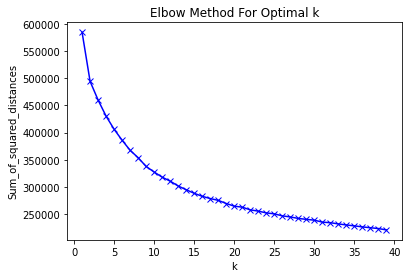

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Finding optimal clusters
sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_features)
    sum_of_squared_distances.append(km.inertia_)
   
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [38]:
# Setting up KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
labels = kmeans.labels_

print(labels)

[9 3 5 ... 1 2 2]


In [39]:
# Add our new labels to the dataframe (from unit 134)
new_series = pd.Series(labels)
df['clusters'] = new_series.values

df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,clusters
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,9
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,3
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,5
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,0


In [40]:
# Returned an array of the labels
kmeans.predict(X_train)

array([9, 3, 5, ..., 1, 2, 2], dtype=int32)

####KNN with cluters

In [41]:
X_train = df.drop(['uri', 'track', 'artist'], axis=1)
y_train = df['uri']
print(X_train)
X_train.shape

       danceability  energy  key  ...  sections  target  clusters
0             0.417   0.620    3  ...         9       1         9
1             0.498   0.505    3  ...        10       0         3
2             0.657   0.649    5  ...        12       0         5
3             0.590   0.545    7  ...         8       0         0
4             0.515   0.765   11  ...        14       0         0
...             ...     ...  ...  ...       ...     ...       ...
41101         0.172   0.358    9  ...         7       0         2
41102         0.910   0.366    1  ...         8       1         3
41103         0.719   0.804   10  ...         7       1         1
41104         0.600   0.177    7  ...        14       0         2
41105         0.121   0.123    4  ...        15       0         2

[40560 rows x 17 columns]


(40560, 17)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [43]:
X_train[0]

array([-0.68458722,  0.16338245, -0.62648161,  0.47319711,  0.66558662,
       -0.37929207,  0.36506163, -0.51229509, -0.71499182,  1.13401311,
        2.27753617, -0.51199837, -2.10350062, -0.37725205, -0.30050861,
        1.01305363,  1.78735012])

In [0]:
from sklearn.neighbors import NearestNeighbors

#training on nearestneighbors
nn = NearestNeighbors(n_neighbors=10).fit(X_train)

In [45]:
#array([[    0, 16075, 26451, 15614, 16357, 10697, 10844, 23785, 15773, 20874]])
nn.kneighbors([[-0.68458722,  0.16338245, -0.62648161,  0.47319711,  0.66558662,
       -0.37929207,  0.36506163, -0.51229509, -0.71499182,  1.13401311,
        2.27753617, -0.51199837, -2.10350062, -0.37725205, -0.30050861,
        1.01305363,  0.9636637 ]], return_distance=False)

array([[    0,  1499,  7963,  4754,   592,  1999,  8468,  4536, 22110,
          219]])

In [0]:
test = [y_train[0], y_train[1499], y_train[7963], 
        y_train[592], y_train[4754]]

In [47]:
df[df['uri'].isin(test)].reindex([0,1499,7963,592,4754])

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,clusters
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,9
1499,What Now,Gene Chandler,spotify:track:2Pjiynk3ppiVHWXzoL05tV,0.401,0.606,5,-6.465,1,0.0651,0.619,0.000000,0.1040,0.687,185.890,170627,3,31.74986,9,1,9
7963,Death Rides a Horse - Version 2,Ennio Morricone,spotify:track:1FNsxBgjTsajTmh3FkliOi,0.630,0.842,2,-3.715,1,0.0290,0.599,0.000003,0.1180,0.539,93.892,122867,4,71.94053,4,0,3
592,Dirty Man,Laura Lee,spotify:track:0762EAuTa9SF0BzPEqbL7w,0.530,0.465,2,-6.231,1,0.0331,0.316,0.000024,0.0894,0.676,167.194,175640,3,30.07743,8,1,3
4754,Some Enchanted Evening,Jay & The Americans,spotify:track:4S4CZX1QAdADmcnikhSEw0,0.448,0.481,5,-10.727,1,0.0311,0.507,0.000028,0.2280,0.455,119.834,137133,4,29.35954,8,1,5


###neural networks

Neural networks seems to be a bit of overkill for the task.

In [0]:
import os
import datetime
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

from tensorflow.keras.callbacks import TensorBoard
# this is the size of our encoded representations
encoding_dim = 1000

# this is our input placeholder
input_shape = Input(shape=(15,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation="elu")(input_shape)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(15, activation="sigmoid")(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_shape, decoded)

In [0]:
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy')

In [0]:

stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = TensorBoard(log_dir=logdir)

autoencoder.fit(X_train, X_train,
                epochs=10000,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose = 1,
                callbacks=[stop, tensorboard])

Epoch 1/10000
62/62 [==============================] - 0s 5ms/step - loss: 0.4739 - val_loss: 0.4116
Epoch 2/10000
62/62 [==============================] - 0s 4ms/step - loss: 0.3929 - val_loss: 0.3814
Epoch 3/10000
62/62 [==============================] - 0s 4ms/step - loss: 0.3770 - val_loss: 0.3740
Epoch 4/10000
62/62 [==============================] - 0s 4ms/step - loss: 0.3725 - val_loss: 0.3716
Epoch 5/10000
62/62 [==============================] - 0s 4ms/step - loss: 0.3705 - val_loss: 0.3699
Epoch 6/10000
62/62 [==============================] - 0s 4ms/step - loss: 0.3694 - val_loss: 0.3692
Epoch 7/10000
62/62 [==============================] - 0s 4ms/step - loss: 0.3689 - val_loss: 0.3686
Epoch 8/10000
62/62 [==============================] - 0s 4ms/step - loss: 0.3685 - val_loss: 0.3684
Epoch 9/10000
62/62 [==============================] - 0s 4ms/step - loss: 0.3683 - val_loss: 0.3683


In [0]:
input_shape = Input(shape=(15,))
encoded = Dense(10, activation='elu')(input_shape)
encoded = Dense(5, activation='elu')(encoded)

encoded = Dense(3, activation='elu')(encoded) #=> This is the dry fruit

decoded = Dense(5, activation='elu')(encoded)
decoded = Dense(10, activation='elu')(decoded)
decoded = Dense(15, activation="softmax")(decoded)

In [0]:
# compile & fit model

autoencoder = Model(input_shape, decoded)

autoencoder.compile(optimizer='adadelta',
                    loss='binary_crossentropy')

stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = TensorBoard(log_dir=logdir)

autoencoder.fit(X_train, X_train,
                epochs=10000,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose = 1,
                callbacks=[stop, tensorboard])

Epoch 1/10000
123/123 [==============================] - 1s 5ms/step - loss: 0.6939 - val_loss: 0.6892
Epoch 2/10000
123/123 [==============================] - 0s 4ms/step - loss: 0.6844 - val_loss: 0.6796
Epoch 3/10000
123/123 [==============================] - 0s 4ms/step - loss: 0.6749 - val_loss: 0.6701
Epoch 4/10000
123/123 [==============================] - 0s 4ms/step - loss: 0.6654 - val_loss: 0.6604
Epoch 5/10000
123/123 [==============================] - 0s 4ms/step - loss: 0.6556 - val_loss: 0.6505
Epoch 6/10000
123/123 [==============================] - 0s 4ms/step - loss: 0.6455 - val_loss: 0.6402
Epoch 7/10000
123/123 [==============================] - 0s 4ms/step - loss: 0.6350 - val_loss: 0.6294
Epoch 8/10000
123/123 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.6183
Epoch 9/10000
123/123 [==============================] - 0s 4ms/step - loss: 0.6130 - val_loss: 0.6070
Epoch 10/10000
123/123 [==============================] - 0s 4ms/step - l

In [0]:
# import matplotlib.pyplot as plt
# x_test_encoded = encoder.predict(X_test, batch_size=32)
# plt.figure(figsize=(6, 6))
# plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
# plt.colorbar()
# plt.show()

In [0]:
# %tensorboard --logdir "./logs"

In [0]:
# encoder = Model(input_shape, encoded)
# encoded_songs = encoder.predict(X_train)

In [0]:
# from sklearn.neighbors import KNeighborsClassifier
# nn = KNeighborsClassifier(n_neighbors=3)
# nn.fit(encoded_songs)

###Pickle model

In [0]:
import pickle

In [0]:
# Its important to use binary mode 
nnPickle = open('nnpickle_file', 'wb') 

# source, destination 
pickle.dump(nn, nnPickle)                      


# load the model from disk
loaded_model = pickle.load(open('nnpickle_file', 'rb'))
result = loaded_model.kneighbors([[0.592, 0.652, 11, -11.258, 0, 0.0574, 0.0603, 0.000397, 0.1390, 0.626, 116.000, 220573, 4, 79.29625, 7, 1, 9]], return_distance=False) 

In [0]:
result 

array([[32740, 32011, 28922, 12908, 10545, 12821,  1414, 17808, 11262,
        32341]])

###Visualization

Automatically created module for IPython interactive environment
n_digits: 5, 	 n_samples 40560, 	 n_features 16
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	1.74s	470141	0.132	1.000	0.233	0.000	-0.000	0.097
random   	1.28s	470141	0.132	1.000	0.233	0.000	0.000	0.097
PCA-based	0.28s	470141	0.132	1.000	0.233	0.000	0.000	0.088
__________________________________________________________________________________


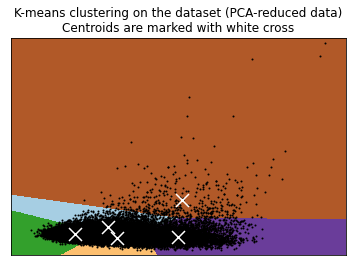

In [0]:

print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits = df.drop(['uri', 'track', 'artist'], axis=1)
y_digits = df['uri']
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = 5
# n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 400

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Automatically created module for IPython interactive environment
Estimated number of clusters: 2
Estimated number of noise points: 19
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.001
Adjusted Rand Index: 0.000
Adjusted Mutual Information: -0.000
Silhouette Coefficient: 0.758


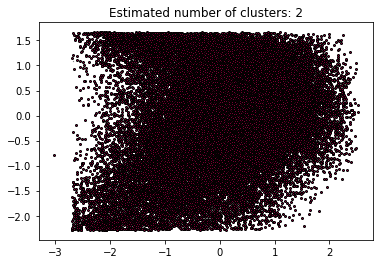

In [48]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# #############################################################################
# Generate sample data

X = df.drop(['uri', 'track', 'artist'], axis=1)
labels_true = df['uri']

X = StandardScaler().fit_transform(X)
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=5, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=2)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=.2)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

###Ideas to work on

- predict top songs with given decade
- return happybirthday song first if its birthday or top song during their birth year.
- 